# Notebook: Predicting CO2 emissions using Neural Networks

Readme: In this notebook, NN models are constructed for CO2 Emission prediction, and the best model is selected and K-means validation is applied.

- **Notebook content**:
    - Design the architecture of NN and explore different model configuration

    - Tune hyperparameters and select the best model

- **Notebook Output**:

    - Best model file

    - The validation and test results of the best model

In [15]:
# %pip install "numpy<2" torch torchvision scikit-learn
# %pip install wandb

In [16]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## 1 Define Plot Functions

In [17]:
# Define functions
import seaborn as sns
import torch

# 1 plot related functions----------------
# plot predict and true values on validation dataset
def plot_pred_true(y_test, y_pred, ax):

    data = pd.DataFrame({'y_obs': y_test, 'y_pred': y_pred})

    # plt.figure(figsize=(5, 5))
    sns.scatterplot(data=data, x='y_obs', y='y_pred', s=10, ax=ax)
    ax.plot(y_test, y_test, color='red', label='y=x')          # plot the line y=x
    ax.set_title('Observed vs Predicted values in Test Dataset')   # title
    ax.set_xlabel('Observed values')       # label for the x-axis
    ax.set_ylabel('Predicted values')      # label for the y-axis
    ax.legend()
    ax.grid(True)

# plot the loss value on training and validation dataset
def plot_train_val_loss(train_loss, val_loss, ax):
    
    # ax.figure(figsize=(5, 5))

    ax.plot(train_loss, label='train loss')
    ax.plot(val_loss, label='val loss')
    ax.set_title('Train vs Validation Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

# 2 Other functions---------------------
# get the prediction and true values
def model_prediction(model, val_loader, device):

    model.eval()
    pred = []
    target = []

    with torch.no_grad():
        for X, y in val_loader:
            X, y = X.to(device), y.to(device)

            y_pred = model(X)      # predicted value

            pred.extend(y_pred.cpu().numpy())
            target.extend(y.cpu().numpy())

    # Merge all the predictions and targets
    predictions = np.concatenate(pred, axis=0)
    labels = np.concatenate(target, axis=0)
    return predictions, labels

## 2 Data Preparation and Feature Selection

In [18]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

### Load and Divide Traning and Testing Data

Load the test and train dataset

In [ ]:
# Import data
trainset_df = pd.read_csv('Dataset1_train.csv')
testset_df = pd.read_csv('Dataset1_test.csv')

In [24]:
# Split the data into training and testing datasets
X_train = trainset_df.drop(columns='CO2 Emissions(g/km)')

In [25]:
X_train

,Model Features,Vehicle Class,Engine Size(L),Cylinders,Gearbox_Type,Gearbox_Number,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,NaN,SUBCOMPACT,3.0,6,1,8.000000,Z,11.4,8.1,9.9,29
1,NaN,PICKUP TRUCK - SMALL,4.0,6,1,5.000000,X,14.7,10.3,12.7,22
2,NaN,COMPACT,3.0,6,0,6.000000,Z,13.8,9.0,11.7,24
3,NaN,TWO-SEATER,3.4,6,0,7.000000,Z,11.3,7.9,9.8,29
4,NaN,STATION WAGON - MID-SIZE,2.0,4,1,8.000000,Z,10.1,7.0,8.7,32
...,...,...,...,...,...,...,...,...,...,...,...
5903,NaN,SUBCOMPACT,2.0,4,0,6.000000,Z,10.3,7.4,9.0,31
5904,NaN,MID-SIZE,3.5,6,1,7.000000,X,10.6,7.3,9.1,31
5905,NaN,SUV - STANDARD,3.5,6,1,8.000000,X,11.7,8.8,10.4,27
5906,NaN,SUV - SMALL,2.5,4,1,6.854093,X,9.5,7.4,8.6,33


In [22]:
train_data_file

'Dataset1_train.csv'

In [23]:


# Split feature and target variables
X = df_emission[['Vehicle Class', 'Transmission', 'Fuel Type', 'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']]
y = df_emission['CO2 Emissions(g/km)']

NameError: name 'df_emission' is not defined

Data Processing - Split dataset, Encode variables, Prepare dataloader

In [ ]:



# Preprocessing - Numerical data & Categorical data

# Divide the data into numerical and categorical data
num_features = X.select_dtypes(include=['int64', 'float64', 'float32']).columns  # select numerical columns
cat_features = X.select_dtypes(include=['object']).columns  # select categorical columns

# numerical columns: 'Vehicle Class', 'Transmission', 'Fuel Type'  
# 'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)'

# Create a pipeline for numerical data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # impute missing values with median
    ('std_scaler', StandardScaler())   # standardize the data
])

# Create a pipeline for categorical data
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # one-hot encode the data
])

# Combine the numerical and categorical pipeline
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Fit and transform the data on the training dataset
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)


Inspect the processed data

In [ ]:
feature_names = list(num_features) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_features))

X_train_df = pd.DataFrame(X_train_processed.toarray(), columns=feature_names)

X_val_df = pd.DataFrame(X_val_processed.toarray(), columns=feature_names)

print("Processed Train Dataset：")
print(X_train_df.head())

print("Processed Test Dataset：")
print(X_val_df.head())


Processed Train Dataset：
   Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0       -0.855137  -0.882323                         -0.698764   
1        1.581199   1.303781                          2.029280   
2       -0.485995  -0.882323                         -0.556678   
3        0.916744   1.303781                          0.608424   
4        0.178460   0.210729                         -0.045170   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                        -0.688304                         -0.713565   
1                         2.173003                          2.106191   
2                        -0.777720                         -0.644791   
3                         0.295271                          0.524377   
4                        -0.196517                         -0.094594   

   Vehicle Class_COMPACT  Vehicle Class_FULL-SIZE  Vehicle Class_MID-SIZE  \
0                    0.0                      0.0                   

In [ ]:
# # Standerdize the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)


In [ ]:
# Prepare the Dataloader
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Convert data to Tensor
X_train_tensor = torch.tensor(X_train_processed.toarray(), dtype=torch.float32) 
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_val_tensor = torch.tensor(X_val_processed.toarray(), dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

# Load the training data and validation data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor,y_val_tensor)

# Set hyperparameters
batch_size = 64  # batch size

# Create data loader
train_Loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_Loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)



## 3 Create Simple Neural Network

### 3.1 Define Neural Network Architecture

In [ ]:
# Define the NN models
# Simple Neural Network, activate funcion - ReLU

class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNeuralNetwork, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size,output_size)
        
    def forward(self, x):
        hidden = self.fc1(x)
        hidden = self.activation(hidden)
        out = self.fc2(hidden)
        return out

# Simple Neural Network, activate funcion - Tanh
class Simple_tanh_NN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Simple_tanh_NN, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size,output_size)
        
    def forward(self, x):
        hidden = self.fc1(x)
        hidden = self.activation(hidden)
        out = self.fc2(hidden)
        return out

### 3.2 Train and Evaluate the NN model 

In [ ]:
# Define helper functions
# Train epoch function
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0

    # for features, target in tqdm(train_loader, desc=f"Training Epoch {epoch+1}"):
    for features, target in train_loader:
        features, target = features.to(device), target.to(device)

        optimizer.zero_grad()
        outputs = model(features) # Forward pass
        loss = criterion(outputs, target)

        loss.backward()  # Backward pass
        optimizer.step() # Update the weights

        running_loss += loss.item() * features.size(0)

    return running_loss / len(train_loader.dataset)

# Validation epoch function
def val_epoch(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for features, target in val_loader:
            # print(featuresfeatures.size(0))
            features, target = features.to(device), target.to(device)
            # features = features.view(features.size(0), -1)

            outputs = model(features)
            loss = criterion(outputs, target)
            val_loss += loss.item() * features.size(0)

    return val_loss / len(val_loader.dataset)



### Hold-out Validation for SimpleNeuralNetwork

#### Set Parameters

In [ ]:
import torch.optim as optim

# Set  hyperparameters
input_size =  X_train_processed.shape[1]   # Input size 
hidden_size = 20            # Hiddern size
output_size = 1             # Output size

learning_rate = 0.02        # Learning rate
n_epochs = 100 # Numebr of epochs

# Initialize the model
nn_model = SimpleNeuralNetwork(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
nn_model.to(device)

# Define the loss function and the optimizer
criterion = nn.MSELoss()    # Mean Squared Error for Linear Regression
optimizer = optim.Adam(nn_model.parameters(), lr=learning_rate)


#### Train and Validate

In [ ]:
# Train & Evaluate the model
train_loss_hist = []
val_loss_hist = []

# Train the model
for epoch in range(n_epochs):  # n_epochs
    train_loss = train_epoch(nn_model, train_Loader, criterion, optimizer, device)
    val_loss = val_epoch(nn_model, val_Loader, criterion, device)

    train_loss_hist.append(train_loss)
    val_loss_hist.append(val_loss)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}')

print("Training complete.")

Epoch 1/100, Train Loss: 32362.8912 | Validation Loss: 1678.1346
Epoch 2/100, Train Loss: 581.6206 | Validation Loss: 155.0283
Epoch 3/100, Train Loss: 90.1562 | Validation Loss: 49.6140
Epoch 4/100, Train Loss: 41.3743 | Validation Loss: 35.2165
Epoch 5/100, Train Loss: 33.5655 | Validation Loss: 28.7034
Epoch 6/100, Train Loss: 30.6513 | Validation Loss: 25.3183
Epoch 7/100, Train Loss: 29.2911 | Validation Loss: 24.4954
Epoch 8/100, Train Loss: 28.6345 | Validation Loss: 23.7372
Epoch 9/100, Train Loss: 28.3204 | Validation Loss: 25.0673
Epoch 10/100, Train Loss: 28.5891 | Validation Loss: 22.8485
Epoch 11/100, Train Loss: 28.2125 | Validation Loss: 22.9436
Epoch 12/100, Train Loss: 28.7348 | Validation Loss: 22.9173
Epoch 13/100, Train Loss: 27.6134 | Validation Loss: 22.1877
Epoch 14/100, Train Loss: 28.2889 | Validation Loss: 25.1020
Epoch 15/100, Train Loss: 28.0502 | Validation Loss: 22.8128
Epoch 16/100, Train Loss: 28.9138 | Validation Loss: 22.0327
Epoch 17/100, Train Loss: 

#### Evaluate Using Validation Loss and Visualization

Validation Loss: 12.1651


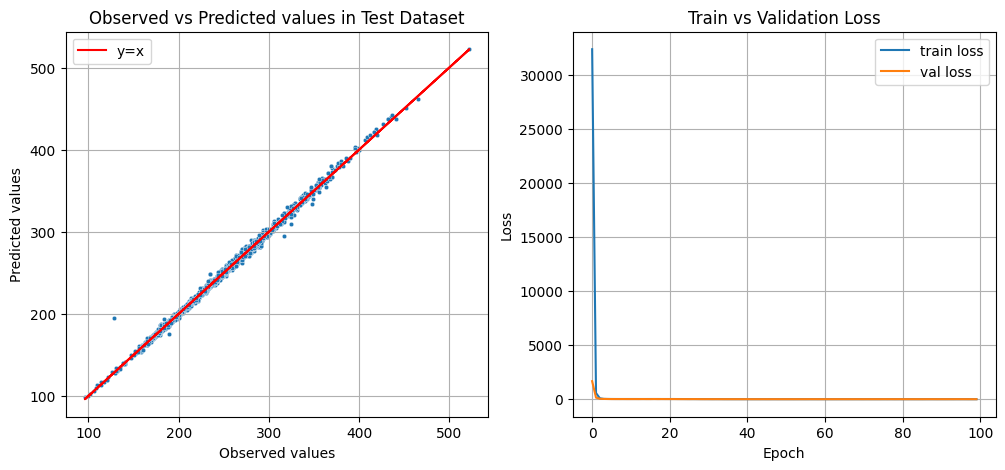

In [ ]:
y_pred, y_label = model_prediction(nn_model, val_Loader, device)

# Evaluate model - Using Validation Loss-------------------
Val_loss = val_loss_hist[-1] # Use the last value of the validation loss as the final loss

print(f'Validation Loss: {Val_loss:.4f}')

# Evaluate model - Using plot--------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot of Observed and Predicted Values
plot_pred_true(y_label, y_pred, ax[0])      

# Plot of Loss values & Epoch
plot_train_val_loss(train_loss_hist, val_loss_hist, ax[1])


### K-fold Cross-Validation

In [ ]:
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold

# Define the two model architectures using lambdas to easily reinitialize per fold
models = {
    "Small Single Model": lambda: SimpleNeuralNetwork(input_size=input_size, hidden_size=16, output_size=1),
    "Large Single Model": lambda: SimpleNeuralNetwork(input_size=input_size, hidden_size=32, output_size=1),
    "Small S_tanh Model": lambda: Simple_tanh_NN(input_size=input_size, hidden_size=16, output_size=1),
    "Large S_tanh Model": lambda: Simple_tanh_NN(input_size=input_size, hidden_size=32, output_size=1)
}

# Set hyperparameters
k_folds = 5         # k=5 fold
num_epochs = 20     # Number of epochs per fold

# Set up K-Fold Cross Validation (K=5)
kfold = KFold(n_splits=k_folds, shuffle=True)

for model_name, model_fn in models.items():
    print(f"Cross Validation for {model_name}")
    
    fold_train_losses = []
    fold_val_losses = []
    fold_number = 1
    
    for train_idx, val_idx in kfold.split(range(len(train_dataset))):     # Generate the idex of training and testing dataset # len(train_dataset) # 5908 
        # print(f"Fold {fold_number}")
        # Create subsets for training and validation data for this fold
        train_subset = Subset(train_dataset, train_idx)
        val_subset = Subset(train_dataset, val_idx)
        
        trainloader = DataLoader(train_subset, batch_size=64, shuffle=True)
        valloader = DataLoader(val_subset, batch_size=64, shuffle=False)
        
        # Initialize model, loss function, and optimizer for this fold
        model = model_fn().to(device)
        criterion = nn.MSELoss()
        optimizer = optim.SGD(model.parameters(), lr=0.001)
        
        # Train for the specified number of epochs and evaluate after each epoch
        for epoch in range(num_epochs):
            train_loss = train_epoch(model, trainloader, criterion, optimizer, device)
            val_loss = val_epoch(model, valloader, criterion, device)
            # print(f" Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}")
        
        fold_train_losses.append(train_loss)
        fold_val_losses.append(val_loss)
        fold_number += 1
        
    overall_train_loss = sum(fold_train_losses) / k_folds
    overall_val_loss = sum(fold_val_losses) / k_folds
    print(f"Overall {model_name} - Train Loss: {overall_train_loss:.4f} | Validation Loss: {overall_val_loss:.4f}")

print("Cross-validation complete.")


Cross Validation for Small Single Model
Overall Small Single Model - Train Loss: 34.5555 | Validation Loss: 28.7375
Cross Validation for Large Single Model
Overall Large Single Model - Train Loss: 38.3966 | Validation Loss: 31.1482
Cross Validation for Small S_tanh Model
Overall Small S_tanh Model - Train Loss: 64.6342 | Validation Loss: 67.1614
Cross Validation for Large S_tanh Model
Overall Large S_tanh Model - Train Loss: 34.3166 | Validation Loss: 34.6036
Cross-validation complete.


#### Set and Train the Model

Select the best model in the K-fold validation, which is the model with activate function tanh, hidden layer size = 32.

In [ ]:
# Initialize the model
sth_nn_model = Simple_tanh_NN(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
sth_nn_model.to(device)

# Define the loss function and the optimizer
criterion = nn.MSELoss()    # Mean Squared Error for Linear Regression
optimizer = optim.Adam(sth_nn_model.parameters(), lr=0.02)

# Train & Evaluate the model
train_loss_hist = []
val_loss_hist = []
n_epochs = 100

# Train the model
for epoch in range(n_epochs):  # n_epochs
    train_loss = train_epoch(sth_nn_model, train_Loader, criterion, optimizer, device)
    val_loss = val_epoch(sth_nn_model, val_Loader, criterion, device)

    train_loss_hist.append(train_loss)
    val_loss_hist.append(val_loss)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}')

print("Training complete.")


Epoch 1/100, Train Loss: 56025.9444 | Validation Loss: 46480.5946
Epoch 2/100, Train Loss: 39058.9320 | Validation Loss: 32540.7850
Epoch 3/100, Train Loss: 27225.5814 | Validation Loss: 22590.6334
Epoch 4/100, Train Loss: 18828.4189 | Validation Loss: 15591.0346
Epoch 5/100, Train Loss: 13017.3093 | Validation Loss: 10846.8125
Epoch 6/100, Train Loss: 9138.9570 | Validation Loss: 7753.0722
Epoch 7/100, Train Loss: 6618.3975 | Validation Loss: 5594.6347
Epoch 8/100, Train Loss: 4794.8214 | Validation Loss: 4121.8539
Epoch 9/100, Train Loss: 3588.5358 | Validation Loss: 3126.7738
Epoch 10/100, Train Loss: 2760.6024 | Validation Loss: 2430.9822
Epoch 11/100, Train Loss: 2174.9971 | Validation Loss: 1936.1600
Epoch 12/100, Train Loss: 1747.8420 | Validation Loss: 1569.6529
Epoch 13/100, Train Loss: 1433.2494 | Validation Loss: 1296.4009
Epoch 14/100, Train Loss: 1198.2873 | Validation Loss: 1082.2671
Epoch 15/100, Train Loss: 1001.7613 | Validation Loss: 902.8560
Epoch 16/100, Train Loss:

#### Using Validation Loss and Visualization to evaluate

Validation Loss: 15.7775


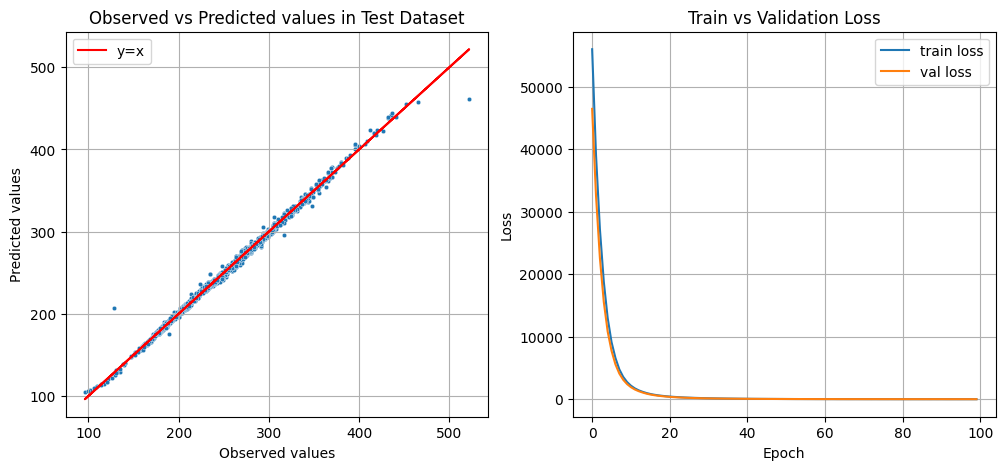

In [ ]:
y_pred, y_label = model_prediction(sth_nn_model, val_Loader, device)

# Evaluate model - Using Validation Loss-------------------
Val_loss = val_loss_hist[-1] # Use the last value of the validation loss as the final loss

print(f'Validation Loss: {Val_loss:.4f}')

# Evaluate model - Using plot--------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot of Observed and Predicted Values
plot_pred_true(y_label, y_pred, ax[0])      

# Plot of Loss values & Epoch
plot_train_val_loss(train_loss_hist, val_loss_hist, ax[1])

## 4 Using W&B

In [ ]:
import wandb

wandb.login(key="47ea61c7ee69e2e0e1cc46ed5c31bd6168f9f9db")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\87383\_netrc
wandb: Currently logged in as: yixuan228 (yixuan228-imperial-college-london) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
class MultiLayerPerceptron(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(MultiLayerPerceptron, self).__init__()

        # Initialise an empty list to hold layers
        layers = []

        # First layer: input to hidden
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.ReLU())

        # Additional hidden layers
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())
            
        # Output layer: hidden to output
        layers.append(nn.Linear(hidden_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [ ]:
from torch.utils.data import random_split

# Calculate the sizes for train and validation splits
num_total = len(train_dataset)
num_train = int(0.9 * num_total)
num_val = num_total - num_train

# Split the dataset
train_subset, val_subset = random_split(train_dataset, [num_train, num_val])

# Create DataLoaders for each subset
train_Loader = DataLoader(train_subset, batch_size=64, shuffle=True)
val_Loader = DataLoader(val_subset, batch_size=64, shuffle=False)

In [ ]:
# Hyperparameter grid
hidden_units_options = [32, 64, 128]    # Numbers of neurons in each hidden layer
hidden_layers_options = [2, 3, 4]       # Numbers of hidden layers
learning_rates = [0.1, 0.01, 0.001]     # Learning rates

max_epochs = 200  # Arbitrarily large; early stopping will likely stop earlier.
patience = 5      # Early stopping patience


In [ ]:
from itertools import product

for hidden_units, hidden_layers, lr in product(hidden_units_options, hidden_layers_options, learning_rates):

    # Configurations
    config = {
        "hidden_units": hidden_units,
        "hidden_layers": hidden_layers,
        "learning_rate": lr,
        "max_epochs": max_epochs,
        "patience": patience
    }

    # Start a new W&B run for each configuration
    wandb.init(project='nn-hyperparameter-finetune', config=config, reinit=True)

    model = MultiLayerPerceptron(input_size=input_size, 
                             hidden_size=config["hidden_units"], 
                             num_layers=config["hidden_layers"], 
                             output_size=1).to(device)


    criterion = nn.MSELoss() 
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_val_loss = float('inf')
    epochs_without_improvement = 0
        
    for epoch in range(1, max_epochs + 1):
        train_loss = train_epoch(model, train_Loader, criterion, optimizer, device)
       
        val_loss = val_epoch(model, val_Loader, criterion, device)

        # Log metrics to W&B
        wandb.log({"epoch": epoch, "train_loss": train_loss, "val_loss": val_loss})
        
        print(f"Epoch {epoch:03d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
        
        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            
        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered at epoch {epoch}")
            break

    wandb.finish()

print("Training complete for all configurations.")


Epoch 001 | Train Loss: 5496.9579 | Val Loss: 40.4507
Epoch 002 | Train Loss: 26.3683 | Val Loss: 42.8964
Epoch 003 | Train Loss: 20.6274 | Val Loss: 17.8683
Epoch 004 | Train Loss: 13.6654 | Val Loss: 31.7879
Epoch 005 | Train Loss: 16.9273 | Val Loss: 12.6617
Epoch 006 | Train Loss: 13.6149 | Val Loss: 16.3754
Epoch 007 | Train Loss: 12.6998 | Val Loss: 14.0926
Epoch 008 | Train Loss: 13.0114 | Val Loss: 24.6959
Epoch 009 | Train Loss: 19.2468 | Val Loss: 21.5161
Epoch 010 | Train Loss: 21.8907 | Val Loss: 21.6076
Early stopping triggered at epoch 10


epoch,▁▂▃▃▄▅▆▆▇█
train_loss,█▁▁▁▁▁▁▁▁▁
val_loss,▇█▂▅▁▂▁▄▃▃
epoch,10
train_loss,21.89067
val_loss,21.60755


Epoch 001 | Train Loss: 24918.1164 | Val Loss: 444.2190
Epoch 002 | Train Loss: 169.1486 | Val Loss: 64.5466
Epoch 003 | Train Loss: 45.4013 | Val Loss: 34.5666
Epoch 004 | Train Loss: 33.6810 | Val Loss: 30.5017
Epoch 005 | Train Loss: 30.1583 | Val Loss: 27.2325
Epoch 006 | Train Loss: 30.3758 | Val Loss: 24.4544
Epoch 007 | Train Loss: 29.8408 | Val Loss: 28.3156
Epoch 008 | Train Loss: 27.4768 | Val Loss: 24.8988
Epoch 009 | Train Loss: 26.6762 | Val Loss: 23.9906
Epoch 010 | Train Loss: 24.9814 | Val Loss: 26.2291
Epoch 011 | Train Loss: 25.3287 | Val Loss: 21.4203
Epoch 012 | Train Loss: 21.9282 | Val Loss: 19.1362
Epoch 013 | Train Loss: 20.1874 | Val Loss: 22.6266
Epoch 014 | Train Loss: 18.8799 | Val Loss: 18.3578
Epoch 015 | Train Loss: 17.3729 | Val Loss: 19.2808
Epoch 016 | Train Loss: 16.3182 | Val Loss: 16.9383
Epoch 017 | Train Loss: 16.3426 | Val Loss: 13.3958
Epoch 018 | Train Loss: 13.6793 | Val Loss: 13.3167
Epoch 019 | Train Loss: 12.7420 | Val Loss: 12.1269
Epoch 0

epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇███
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,31
train_loss,10.47233
val_loss,11.44828


Epoch 001 | Train Loss: 65523.0298 | Val Loss: 62409.2402
Epoch 002 | Train Loss: 54655.3536 | Val Loss: 40398.5237
Epoch 003 | Train Loss: 22569.7973 | Val Loss: 7767.2753
Epoch 004 | Train Loss: 3419.1089 | Val Loss: 1664.0572
Epoch 005 | Train Loss: 1315.0354 | Val Loss: 874.7610
Epoch 006 | Train Loss: 735.1983 | Val Loss: 507.7625
Epoch 007 | Train Loss: 445.7940 | Val Loss: 327.1740
Epoch 008 | Train Loss: 293.7689 | Val Loss: 234.4194
Epoch 009 | Train Loss: 206.0494 | Val Loss: 182.1738
Epoch 010 | Train Loss: 153.5616 | Val Loss: 146.5418
Epoch 011 | Train Loss: 119.1496 | Val Loss: 118.7064
Epoch 012 | Train Loss: 94.5747 | Val Loss: 98.1766
Epoch 013 | Train Loss: 76.2084 | Val Loss: 79.7702
Epoch 014 | Train Loss: 62.9262 | Val Loss: 65.8091
Epoch 015 | Train Loss: 52.3391 | Val Loss: 55.5022
Epoch 016 | Train Loss: 44.9016 | Val Loss: 47.1346
Epoch 017 | Train Loss: 39.8419 | Val Loss: 42.5322
Epoch 018 | Train Loss: 36.0808 | Val Loss: 38.0470
Epoch 019 | Train Loss: 33.4

epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇████
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,117
train_loss,8.3774
val_loss,9.16177


Epoch 001 | Train Loss: 5234.3897 | Val Loss: 84.9958
Epoch 002 | Train Loss: 48.6884 | Val Loss: 31.7796
Epoch 003 | Train Loss: 33.5626 | Val Loss: 22.4491
Epoch 004 | Train Loss: 31.9792 | Val Loss: 38.8732
Epoch 005 | Train Loss: 24.0636 | Val Loss: 17.5774
Epoch 006 | Train Loss: 14.4261 | Val Loss: 26.8513
Epoch 007 | Train Loss: 18.7353 | Val Loss: 73.1470
Epoch 008 | Train Loss: 37.2378 | Val Loss: 63.9719
Epoch 009 | Train Loss: 42.4232 | Val Loss: 59.4629
Epoch 010 | Train Loss: 39.4598 | Val Loss: 44.6706
Early stopping triggered at epoch 10


epoch,▁▂▃▃▄▅▆▆▇█
train_loss,█▁▁▁▁▁▁▁▁▁
val_loss,█▂▂▃▁▂▇▆▅▄
epoch,10
train_loss,39.45983
val_loss,44.67062


Epoch 001 | Train Loss: 18730.3664 | Val Loss: 172.4391
Epoch 002 | Train Loss: 74.3422 | Val Loss: 38.1041
Epoch 003 | Train Loss: 32.7025 | Val Loss: 31.5197
Epoch 004 | Train Loss: 27.1403 | Val Loss: 26.4821
Epoch 005 | Train Loss: 22.3105 | Val Loss: 24.8034
Epoch 006 | Train Loss: 17.7788 | Val Loss: 16.1934
Epoch 007 | Train Loss: 14.4955 | Val Loss: 18.2264
Epoch 008 | Train Loss: 13.2252 | Val Loss: 12.2165
Epoch 009 | Train Loss: 10.9780 | Val Loss: 9.3620
Epoch 010 | Train Loss: 9.8406 | Val Loss: 9.2286
Epoch 011 | Train Loss: 9.4157 | Val Loss: 12.3883
Epoch 012 | Train Loss: 9.9505 | Val Loss: 9.4034
Epoch 013 | Train Loss: 9.9047 | Val Loss: 11.6751
Epoch 014 | Train Loss: 9.9736 | Val Loss: 12.2701
Epoch 015 | Train Loss: 9.4526 | Val Loss: 11.0871
Early stopping triggered at epoch 15


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch,15
train_loss,9.45262
val_loss,11.08709


Epoch 001 | Train Loss: 65256.3792 | Val Loss: 59863.7527
Epoch 002 | Train Loss: 31455.1771 | Val Loss: 2833.0566
Epoch 003 | Train Loss: 1765.5939 | Val Loss: 832.5679
Epoch 004 | Train Loss: 567.1551 | Val Loss: 331.8467
Epoch 005 | Train Loss: 257.8671 | Val Loss: 197.4566
Epoch 006 | Train Loss: 148.5815 | Val Loss: 125.4637
Epoch 007 | Train Loss: 96.7510 | Val Loss: 86.4499
Epoch 008 | Train Loss: 68.1653 | Val Loss: 63.3504
Epoch 009 | Train Loss: 52.1074 | Val Loss: 50.1422
Epoch 010 | Train Loss: 41.8337 | Val Loss: 41.2025
Epoch 011 | Train Loss: 36.3727 | Val Loss: 36.6165
Epoch 012 | Train Loss: 32.8587 | Val Loss: 32.5629
Epoch 013 | Train Loss: 31.0466 | Val Loss: 29.7533
Epoch 014 | Train Loss: 29.6818 | Val Loss: 28.1707
Epoch 015 | Train Loss: 28.8838 | Val Loss: 27.6520
Epoch 016 | Train Loss: 27.9703 | Val Loss: 28.4162
Epoch 017 | Train Loss: 27.1134 | Val Loss: 26.2907
Epoch 018 | Train Loss: 26.7348 | Val Loss: 25.3480
Epoch 019 | Train Loss: 26.1466 | Val Loss: 

epoch,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇██
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,87
train_loss,9.54253
val_loss,10.7066


Epoch 001 | Train Loss: 26734.0477 | Val Loss: 376.1413
Epoch 002 | Train Loss: 163.2790 | Val Loss: 47.8105
Epoch 003 | Train Loss: 41.4808 | Val Loss: 49.5983
Epoch 004 | Train Loss: 26.4487 | Val Loss: 18.2729
Epoch 005 | Train Loss: 18.8635 | Val Loss: 18.3093
Epoch 006 | Train Loss: 20.3838 | Val Loss: 29.5309
Epoch 007 | Train Loss: 14.7302 | Val Loss: 19.3834
Epoch 008 | Train Loss: 13.4371 | Val Loss: 23.2047
Epoch 009 | Train Loss: 12.1810 | Val Loss: 12.8721
Epoch 010 | Train Loss: 16.4963 | Val Loss: 19.1798
Epoch 011 | Train Loss: 35.0928 | Val Loss: 12.8362
Epoch 012 | Train Loss: 13.2777 | Val Loss: 12.3550
Epoch 013 | Train Loss: 13.6035 | Val Loss: 17.8063
Epoch 014 | Train Loss: 12.0171 | Val Loss: 31.3140
Epoch 015 | Train Loss: 25.3304 | Val Loss: 18.9111
Epoch 016 | Train Loss: 16.0689 | Val Loss: 11.1263
Epoch 017 | Train Loss: 29.7901 | Val Loss: 22.5115
Epoch 018 | Train Loss: 21.5902 | Val Loss: 115.8425
Epoch 019 | Train Loss: 28.7767 | Val Loss: 18.0386
Epoch 

epoch,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▁▁
epoch,21
train_loss,12.27028
val_loss,16.56207


Epoch 001 | Train Loss: 15248.7982 | Val Loss: 138.0378
Epoch 002 | Train Loss: 53.8563 | Val Loss: 29.4766
Epoch 003 | Train Loss: 30.3447 | Val Loss: 35.0026
Epoch 004 | Train Loss: 27.8727 | Val Loss: 24.5687
Epoch 005 | Train Loss: 24.6008 | Val Loss: 22.2301
Epoch 006 | Train Loss: 21.4425 | Val Loss: 31.0307
Epoch 007 | Train Loss: 25.0096 | Val Loss: 14.6657
Epoch 008 | Train Loss: 17.8843 | Val Loss: 14.3946
Epoch 009 | Train Loss: 15.9424 | Val Loss: 19.8499
Epoch 010 | Train Loss: 14.3701 | Val Loss: 12.0578
Epoch 011 | Train Loss: 13.8983 | Val Loss: 11.3868
Epoch 012 | Train Loss: 11.7203 | Val Loss: 12.0775
Epoch 013 | Train Loss: 11.8755 | Val Loss: 13.4453
Epoch 014 | Train Loss: 11.4360 | Val Loss: 11.3509
Epoch 015 | Train Loss: 11.4607 | Val Loss: 16.5043
Epoch 016 | Train Loss: 13.4680 | Val Loss: 15.2713
Epoch 017 | Train Loss: 11.8247 | Val Loss: 14.5366
Epoch 018 | Train Loss: 11.2322 | Val Loss: 17.1232
Epoch 019 | Train Loss: 11.2339 | Val Loss: 16.7295
Early st

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,19
train_loss,11.23393
val_loss,16.72951


Epoch 001 | Train Loss: 63500.0699 | Val Loss: 45538.8224
Epoch 002 | Train Loss: 9021.8936 | Val Loss: 859.7086
Epoch 003 | Train Loss: 501.1615 | Val Loss: 251.5290
Epoch 004 | Train Loss: 184.0501 | Val Loss: 136.8307
Epoch 005 | Train Loss: 101.1796 | Val Loss: 84.0044
Epoch 006 | Train Loss: 65.3093 | Val Loss: 56.1922
Epoch 007 | Train Loss: 48.1658 | Val Loss: 43.3036
Epoch 008 | Train Loss: 39.9908 | Val Loss: 36.1053
Epoch 009 | Train Loss: 35.5445 | Val Loss: 33.0286
Epoch 010 | Train Loss: 32.6521 | Val Loss: 29.5859
Epoch 011 | Train Loss: 31.1748 | Val Loss: 29.1816
Epoch 012 | Train Loss: 29.7605 | Val Loss: 27.5320
Epoch 013 | Train Loss: 28.9509 | Val Loss: 29.2256
Epoch 014 | Train Loss: 28.3746 | Val Loss: 26.4537
Epoch 015 | Train Loss: 26.8465 | Val Loss: 24.1428
Epoch 016 | Train Loss: 26.4575 | Val Loss: 24.3448
Epoch 017 | Train Loss: 26.1146 | Val Loss: 23.4266
Epoch 018 | Train Loss: 25.0195 | Val Loss: 24.1690
Epoch 019 | Train Loss: 24.2111 | Val Loss: 23.384

epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇██
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,73
train_loss,9.6946
val_loss,10.62029


Epoch 001 | Train Loss: 3598.4636 | Val Loss: 35.5829
Epoch 002 | Train Loss: 25.8056 | Val Loss: 14.1161
Epoch 003 | Train Loss: 16.9091 | Val Loss: 17.9933
Epoch 004 | Train Loss: 16.5366 | Val Loss: 10.4582
Epoch 005 | Train Loss: 15.8037 | Val Loss: 13.1231
Epoch 006 | Train Loss: 30.1165 | Val Loss: 23.0766
Epoch 007 | Train Loss: 30.0671 | Val Loss: 15.3021
Epoch 008 | Train Loss: 28.9817 | Val Loss: 123.6965
Epoch 009 | Train Loss: 115.9730 | Val Loss: 21.0444
Early stopping triggered at epoch 9


epoch,▁▂▃▄▅▅▆▇█
train_loss,█▁▁▁▁▁▁▁▁
val_loss,▃▁▁▁▁▂▁█▂
epoch,9
train_loss,115.97295
val_loss,21.04442


Epoch 001 | Train Loss: 17695.1872 | Val Loss: 194.7251
Epoch 002 | Train Loss: 83.4209 | Val Loss: 38.7754
Epoch 003 | Train Loss: 36.3965 | Val Loss: 26.8262
Epoch 004 | Train Loss: 31.1695 | Val Loss: 26.9810
Epoch 005 | Train Loss: 30.3439 | Val Loss: 27.5874
Epoch 006 | Train Loss: 29.0812 | Val Loss: 25.1213
Epoch 007 | Train Loss: 28.4743 | Val Loss: 24.7252
Epoch 008 | Train Loss: 28.2000 | Val Loss: 22.6176
Epoch 009 | Train Loss: 26.0248 | Val Loss: 20.5884
Epoch 010 | Train Loss: 23.3796 | Val Loss: 18.1427
Epoch 011 | Train Loss: 22.7144 | Val Loss: 17.6605
Epoch 012 | Train Loss: 18.6555 | Val Loss: 16.1749
Epoch 013 | Train Loss: 16.5230 | Val Loss: 16.7752
Epoch 014 | Train Loss: 15.3947 | Val Loss: 14.9431
Epoch 015 | Train Loss: 15.8091 | Val Loss: 18.6773
Epoch 016 | Train Loss: 13.5295 | Val Loss: 16.1736
Epoch 017 | Train Loss: 13.3209 | Val Loss: 11.8584
Epoch 018 | Train Loss: 12.0193 | Val Loss: 13.2630
Epoch 019 | Train Loss: 12.9122 | Val Loss: 10.9966
Epoch 02

epoch,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,26
train_loss,11.39769
val_loss,11.11055


Epoch 001 | Train Loss: 63305.8308 | Val Loss: 53471.9830
Epoch 002 | Train Loss: 28517.1876 | Val Loss: 5952.4607
Epoch 003 | Train Loss: 2244.3840 | Val Loss: 1076.2974
Epoch 004 | Train Loss: 831.8601 | Val Loss: 540.9543
Epoch 005 | Train Loss: 446.5547 | Val Loss: 312.9281
Epoch 006 | Train Loss: 260.8304 | Val Loss: 207.9230
Epoch 007 | Train Loss: 167.3580 | Val Loss: 146.6253
Epoch 008 | Train Loss: 117.1055 | Val Loss: 108.8836
Epoch 009 | Train Loss: 86.0078 | Val Loss: 83.3900
Epoch 010 | Train Loss: 66.1885 | Val Loss: 64.9553
Epoch 011 | Train Loss: 52.2301 | Val Loss: 52.5631
Epoch 012 | Train Loss: 43.8934 | Val Loss: 45.1499
Epoch 013 | Train Loss: 38.2976 | Val Loss: 39.6516
Epoch 014 | Train Loss: 34.8882 | Val Loss: 35.0843
Epoch 015 | Train Loss: 32.6809 | Val Loss: 32.9043
Epoch 016 | Train Loss: 31.2065 | Val Loss: 31.0362
Epoch 017 | Train Loss: 29.8672 | Val Loss: 29.7417
Epoch 018 | Train Loss: 29.4112 | Val Loss: 29.0422
Epoch 019 | Train Loss: 29.5584 | Val L

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
train_loss,█▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,41
train_loss,26.50674
val_loss,28.24394


Epoch 001 | Train Loss: 34727.7059 | Val Loss: 510.5887
Epoch 002 | Train Loss: 257.1549 | Val Loss: 66.0092
Epoch 003 | Train Loss: 55.7063 | Val Loss: 48.0459
Epoch 004 | Train Loss: 32.8490 | Val Loss: 29.2143
Epoch 005 | Train Loss: 31.1810 | Val Loss: 20.8591
Epoch 006 | Train Loss: 18.2406 | Val Loss: 13.9202
Epoch 007 | Train Loss: 17.2820 | Val Loss: 79.6653
Epoch 008 | Train Loss: 35.7591 | Val Loss: 27.5381
Epoch 009 | Train Loss: 23.1969 | Val Loss: 14.0972
Epoch 010 | Train Loss: 20.8376 | Val Loss: 22.4453
Epoch 011 | Train Loss: 43.3244 | Val Loss: 22.0978
Early stopping triggered at epoch 11


epoch,▁▂▂▃▄▅▅▆▇▇█
train_loss,█▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▁▁▁▁▂▁▁▁▁
epoch,11
train_loss,43.32435
val_loss,22.09777


Epoch 001 | Train Loss: 12414.2518 | Val Loss: 85.9815
Epoch 002 | Train Loss: 43.4670 | Val Loss: 37.6430
Epoch 003 | Train Loss: 23.2031 | Val Loss: 23.9983
Epoch 004 | Train Loss: 16.5232 | Val Loss: 19.2060
Epoch 005 | Train Loss: 13.5412 | Val Loss: 12.2186
Epoch 006 | Train Loss: 11.1065 | Val Loss: 10.6742
Epoch 007 | Train Loss: 10.5197 | Val Loss: 12.3574
Epoch 008 | Train Loss: 10.0865 | Val Loss: 9.9673
Epoch 009 | Train Loss: 8.8666 | Val Loss: 10.4093
Epoch 010 | Train Loss: 10.0186 | Val Loss: 9.4149
Epoch 011 | Train Loss: 9.0391 | Val Loss: 9.4210
Epoch 012 | Train Loss: 11.0020 | Val Loss: 8.4487
Epoch 013 | Train Loss: 9.6346 | Val Loss: 9.6048
Epoch 014 | Train Loss: 9.8583 | Val Loss: 19.5392
Epoch 015 | Train Loss: 11.6507 | Val Loss: 21.5857
Epoch 016 | Train Loss: 13.1611 | Val Loss: 10.4029
Epoch 017 | Train Loss: 9.7243 | Val Loss: 9.6347
Early stopping triggered at epoch 17


epoch,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▄▂▂▁▁▁▁▁▁▁▁▁▂▂▁▁
epoch,17
train_loss,9.7243
val_loss,9.63471


Epoch 001 | Train Loss: 57787.8409 | Val Loss: 20667.7141
Epoch 002 | Train Loss: 3532.1956 | Val Loss: 652.5188
Epoch 003 | Train Loss: 407.2414 | Val Loss: 237.0060
Epoch 004 | Train Loss: 169.6114 | Val Loss: 125.8575
Epoch 005 | Train Loss: 93.7958 | Val Loss: 76.5411
Epoch 006 | Train Loss: 59.6922 | Val Loss: 52.1159
Epoch 007 | Train Loss: 44.1815 | Val Loss: 40.2884
Epoch 008 | Train Loss: 36.3228 | Val Loss: 33.4227
Epoch 009 | Train Loss: 32.5719 | Val Loss: 31.3422
Epoch 010 | Train Loss: 30.5912 | Val Loss: 31.2860
Epoch 011 | Train Loss: 28.4168 | Val Loss: 27.5924
Epoch 012 | Train Loss: 28.4004 | Val Loss: 28.1050
Epoch 013 | Train Loss: 27.0222 | Val Loss: 26.6351
Epoch 014 | Train Loss: 26.2851 | Val Loss: 25.7956
Epoch 015 | Train Loss: 25.7935 | Val Loss: 25.6698
Epoch 016 | Train Loss: 24.1168 | Val Loss: 23.4349
Epoch 017 | Train Loss: 23.4115 | Val Loss: 22.5399
Epoch 018 | Train Loss: 22.2681 | Val Loss: 21.8059
Epoch 019 | Train Loss: 21.8822 | Val Loss: 20.1384

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇███
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,51
train_loss,8.7793
val_loss,8.37608


Epoch 001 | Train Loss: 16702.9178 | Val Loss: 215.3401
Epoch 002 | Train Loss: 70.5082 | Val Loss: 82.0205
Epoch 003 | Train Loss: 32.4518 | Val Loss: 32.2607
Epoch 004 | Train Loss: 25.7115 | Val Loss: 25.7371
Epoch 005 | Train Loss: 18.6466 | Val Loss: 24.3466
Epoch 006 | Train Loss: 17.1962 | Val Loss: 22.9128
Epoch 007 | Train Loss: 16.6261 | Val Loss: 14.1304
Epoch 008 | Train Loss: 16.1533 | Val Loss: 28.1533
Epoch 009 | Train Loss: 18.3552 | Val Loss: 12.7103
Epoch 010 | Train Loss: 16.6086 | Val Loss: 18.2588
Epoch 011 | Train Loss: 23.9892 | Val Loss: 15.0860
Epoch 012 | Train Loss: 18.6739 | Val Loss: 14.4130
Epoch 013 | Train Loss: 10.9845 | Val Loss: 20.9771
Epoch 014 | Train Loss: 20.9098 | Val Loss: 31.7509
Early stopping triggered at epoch 14


epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▃▂▁▁▁▁▂▁▁▁▁▁▂
epoch,14
train_loss,20.90981
val_loss,31.75094


Epoch 001 | Train Loss: 10911.7335 | Val Loss: 58.2366
Epoch 002 | Train Loss: 38.7100 | Val Loss: 29.4896
Epoch 003 | Train Loss: 28.0473 | Val Loss: 22.6311
Epoch 004 | Train Loss: 23.2589 | Val Loss: 19.9334
Epoch 005 | Train Loss: 18.7845 | Val Loss: 15.9202
Epoch 006 | Train Loss: 15.4095 | Val Loss: 12.1501
Epoch 007 | Train Loss: 11.9041 | Val Loss: 13.8070
Epoch 008 | Train Loss: 11.2309 | Val Loss: 12.5639
Epoch 009 | Train Loss: 11.4641 | Val Loss: 21.4798
Epoch 010 | Train Loss: 12.7773 | Val Loss: 9.2370
Epoch 011 | Train Loss: 10.9854 | Val Loss: 10.0181
Epoch 012 | Train Loss: 11.5683 | Val Loss: 9.0898
Epoch 013 | Train Loss: 9.4844 | Val Loss: 12.4917
Epoch 014 | Train Loss: 12.5867 | Val Loss: 14.9213
Epoch 015 | Train Loss: 9.9178 | Val Loss: 10.1887
Epoch 016 | Train Loss: 11.3680 | Val Loss: 10.3087
Epoch 017 | Train Loss: 12.1249 | Val Loss: 8.7008
Epoch 018 | Train Loss: 11.9123 | Val Loss: 29.8611
Epoch 019 | Train Loss: 14.7668 | Val Loss: 25.3265
Epoch 020 | Tr

epoch,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▄▂▂▂▁▁▁▁▂▁▁▁▁▁▁▁▁▂▂▁▁█▂▁▁▃
epoch,26
train_loss,22.27577
val_loss,35.44447


Epoch 001 | Train Loss: 51362.7477 | Val Loss: 5299.6386
Epoch 002 | Train Loss: 1670.6013 | Val Loss: 405.5880
Epoch 003 | Train Loss: 252.6002 | Val Loss: 157.3646
Epoch 004 | Train Loss: 105.7476 | Val Loss: 86.7139
Epoch 005 | Train Loss: 57.5469 | Val Loss: 50.4048
Epoch 006 | Train Loss: 37.8107 | Val Loss: 36.2840
Epoch 007 | Train Loss: 28.7188 | Val Loss: 27.0687
Epoch 008 | Train Loss: 24.5765 | Val Loss: 23.5148
Epoch 009 | Train Loss: 21.3520 | Val Loss: 21.0638
Epoch 010 | Train Loss: 19.6368 | Val Loss: 19.4676
Epoch 011 | Train Loss: 18.0527 | Val Loss: 17.9000
Epoch 012 | Train Loss: 16.4588 | Val Loss: 17.4268
Epoch 013 | Train Loss: 15.6756 | Val Loss: 15.6447
Epoch 014 | Train Loss: 14.3719 | Val Loss: 14.5764
Epoch 015 | Train Loss: 13.3366 | Val Loss: 15.6483
Epoch 016 | Train Loss: 12.8362 | Val Loss: 14.3501
Epoch 017 | Train Loss: 11.9635 | Val Loss: 14.4265
Epoch 018 | Train Loss: 11.4843 | Val Loss: 11.8421
Epoch 019 | Train Loss: 11.0987 | Val Loss: 11.5801
E

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇██
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,43
train_loss,8.45614
val_loss,7.57372


Epoch 001 | Train Loss: 6560.9006 | Val Loss: 38.7572
Epoch 002 | Train Loss: 26.6797 | Val Loss: 23.9516
Epoch 003 | Train Loss: 18.2720 | Val Loss: 39.2433
Epoch 004 | Train Loss: 17.0009 | Val Loss: 31.3367
Epoch 005 | Train Loss: 18.0576 | Val Loss: 25.2318
Epoch 006 | Train Loss: 15.1775 | Val Loss: 14.9132
Epoch 007 | Train Loss: 15.6884 | Val Loss: 47.1772
Epoch 008 | Train Loss: 15.7352 | Val Loss: 17.8802
Epoch 009 | Train Loss: 19.6014 | Val Loss: 34.3420
Epoch 010 | Train Loss: 27.7691 | Val Loss: 25.0868
Epoch 011 | Train Loss: 25.4241 | Val Loss: 39.8014
Early stopping triggered at epoch 11


epoch,▁▂▂▃▄▅▅▆▇▇█
train_loss,█▁▁▁▁▁▁▁▁▁▁
val_loss,▆▃▆▅▃▁█▂▅▃▆
epoch,11
train_loss,25.42407
val_loss,39.80137


Epoch 001 | Train Loss: 11377.9255 | Val Loss: 84.6750
Epoch 002 | Train Loss: 45.2733 | Val Loss: 29.6476
Epoch 003 | Train Loss: 30.9748 | Val Loss: 27.3897
Epoch 004 | Train Loss: 29.5306 | Val Loss: 24.4967
Epoch 005 | Train Loss: 27.5903 | Val Loss: 25.7027
Epoch 006 | Train Loss: 26.3798 | Val Loss: 21.2442
Epoch 007 | Train Loss: 23.9616 | Val Loss: 19.0132
Epoch 008 | Train Loss: 23.6936 | Val Loss: 20.9504
Epoch 009 | Train Loss: 20.1131 | Val Loss: 17.8814
Epoch 010 | Train Loss: 17.3920 | Val Loss: 15.5460
Epoch 011 | Train Loss: 15.1272 | Val Loss: 13.7325
Epoch 012 | Train Loss: 14.6801 | Val Loss: 13.7253
Epoch 013 | Train Loss: 14.5166 | Val Loss: 13.7495
Epoch 014 | Train Loss: 13.8850 | Val Loss: 15.6205
Epoch 015 | Train Loss: 16.6628 | Val Loss: 15.4553
Epoch 016 | Train Loss: 14.0149 | Val Loss: 10.9295
Epoch 017 | Train Loss: 11.6217 | Val Loss: 20.4259
Epoch 018 | Train Loss: 13.2984 | Val Loss: 13.0764
Epoch 019 | Train Loss: 11.7796 | Val Loss: 14.1823
Epoch 020

epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇███
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▃▃▂▂▂▂▂▂▂▁▁▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▂▃▂
epoch,31
train_loss,13.5038
val_loss,16.96171


Epoch 001 | Train Loss: 57718.6715 | Val Loss: 31638.6798
Epoch 002 | Train Loss: 7769.4948 | Val Loss: 1286.5772
Epoch 003 | Train Loss: 780.7412 | Val Loss: 388.1278
Epoch 004 | Train Loss: 279.1049 | Val Loss: 186.9453
Epoch 005 | Train Loss: 140.8020 | Val Loss: 111.0441
Epoch 006 | Train Loss: 85.6015 | Val Loss: 73.0469
Epoch 007 | Train Loss: 58.4191 | Val Loss: 53.0887
Epoch 008 | Train Loss: 45.0966 | Val Loss: 42.1272
Epoch 009 | Train Loss: 37.7576 | Val Loss: 36.2891
Epoch 010 | Train Loss: 33.7018 | Val Loss: 34.7009
Epoch 011 | Train Loss: 32.1686 | Val Loss: 30.0309
Epoch 012 | Train Loss: 29.2821 | Val Loss: 28.8478
Epoch 013 | Train Loss: 28.8651 | Val Loss: 27.4253
Epoch 014 | Train Loss: 28.3147 | Val Loss: 28.9625
Epoch 015 | Train Loss: 27.5289 | Val Loss: 27.0725
Epoch 016 | Train Loss: 27.6007 | Val Loss: 26.1725
Epoch 017 | Train Loss: 27.1753 | Val Loss: 26.3816
Epoch 018 | Train Loss: 26.8194 | Val Loss: 26.0989
Epoch 019 | Train Loss: 26.7886 | Val Loss: 25.5

epoch,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇██
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,77
train_loss,10.47543
val_loss,11.20577


Epoch 001 | Train Loss: 27483.6861 | Val Loss: 274.1655
Epoch 002 | Train Loss: 104.5711 | Val Loss: 50.6944
Epoch 003 | Train Loss: 47.7238 | Val Loss: 74.4460
Epoch 004 | Train Loss: 40.7275 | Val Loss: 21.3252
Epoch 005 | Train Loss: 29.4718 | Val Loss: 21.4335
Epoch 006 | Train Loss: 29.6290 | Val Loss: 15.5345
Epoch 007 | Train Loss: 24.9290 | Val Loss: 24.6608
Epoch 008 | Train Loss: 28.9881 | Val Loss: 17.8410
Epoch 009 | Train Loss: 41.4131 | Val Loss: 308.1643
Epoch 010 | Train Loss: 78.3579 | Val Loss: 42.0394
Epoch 011 | Train Loss: 32.0576 | Val Loss: 26.2115
Early stopping triggered at epoch 11


epoch,▁▂▂▃▄▅▅▆▇▇█
train_loss,█▁▁▁▁▁▁▁▁▁▁
val_loss,▇▂▂▁▁▁▁▁█▂▁
epoch,11
train_loss,32.05761
val_loss,26.21151


Epoch 001 | Train Loss: 8464.8321 | Val Loss: 79.6719
Epoch 002 | Train Loss: 38.8606 | Val Loss: 27.0715
Epoch 003 | Train Loss: 30.6169 | Val Loss: 39.3989
Epoch 004 | Train Loss: 31.2091 | Val Loss: 22.5475
Epoch 005 | Train Loss: 22.9022 | Val Loss: 27.3280
Epoch 006 | Train Loss: 21.3497 | Val Loss: 19.0226
Epoch 007 | Train Loss: 20.7765 | Val Loss: 15.5173
Epoch 008 | Train Loss: 14.7349 | Val Loss: 16.5419
Epoch 009 | Train Loss: 16.9717 | Val Loss: 19.3308
Epoch 010 | Train Loss: 17.0689 | Val Loss: 16.6380
Epoch 011 | Train Loss: 13.3575 | Val Loss: 15.5770
Epoch 012 | Train Loss: 14.7927 | Val Loss: 11.6949
Epoch 013 | Train Loss: 13.1233 | Val Loss: 13.8148
Epoch 014 | Train Loss: 12.8515 | Val Loss: 20.3190
Epoch 015 | Train Loss: 17.0160 | Val Loss: 27.4657
Epoch 016 | Train Loss: 15.0881 | Val Loss: 13.5425
Epoch 017 | Train Loss: 12.8546 | Val Loss: 11.3582
Epoch 018 | Train Loss: 10.5893 | Val Loss: 15.5767
Epoch 019 | Train Loss: 14.6785 | Val Loss: 17.2306
Epoch 020 

epoch,▁▁▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇██
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▇▂▃▂▂▂▁▁▂▁▁▁▁▂▂▁▁▁▂▁▄▁▁▁█▃▂
epoch,27
train_loss,19.60748
val_loss,18.74162


Epoch 001 | Train Loss: 40988.5228 | Val Loss: 2565.2813
Epoch 002 | Train Loss: 1014.9051 | Val Loss: 336.2618
Epoch 003 | Train Loss: 205.5071 | Val Loss: 138.3316
Epoch 004 | Train Loss: 89.8990 | Val Loss: 74.5012
Epoch 005 | Train Loss: 53.3180 | Val Loss: 50.5683
Epoch 006 | Train Loss: 39.8787 | Val Loss: 38.7347
Epoch 007 | Train Loss: 33.4798 | Val Loss: 32.7504
Epoch 008 | Train Loss: 30.1261 | Val Loss: 30.0014
Epoch 009 | Train Loss: 27.5212 | Val Loss: 28.2646
Epoch 010 | Train Loss: 25.7735 | Val Loss: 25.6611
Epoch 011 | Train Loss: 24.0300 | Val Loss: 23.4193
Epoch 012 | Train Loss: 22.0625 | Val Loss: 23.7129
Epoch 013 | Train Loss: 20.6493 | Val Loss: 20.9334
Epoch 014 | Train Loss: 19.3192 | Val Loss: 19.3872
Epoch 015 | Train Loss: 17.6107 | Val Loss: 17.6850
Epoch 016 | Train Loss: 16.5890 | Val Loss: 17.7493
Epoch 017 | Train Loss: 15.4564 | Val Loss: 16.0501
Epoch 018 | Train Loss: 14.5192 | Val Loss: 17.9133
Epoch 019 | Train Loss: 13.6776 | Val Loss: 13.7522
Ep

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇██
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,43
train_loss,8.82874
val_loss,9.80874


Epoch 001 | Train Loss: 17961.5042 | Val Loss: 638.9641
Epoch 002 | Train Loss: 433.7446 | Val Loss: 283.6281
Epoch 003 | Train Loss: 221.9961 | Val Loss: 122.1593
Epoch 004 | Train Loss: 227.0249 | Val Loss: 1796.5773
Epoch 005 | Train Loss: 653.9130 | Val Loss: 145.6390
Epoch 006 | Train Loss: 101.0020 | Val Loss: 54.2007
Epoch 007 | Train Loss: 35.7776 | Val Loss: 30.8743
Epoch 008 | Train Loss: 22.2822 | Val Loss: 14.8453
Epoch 009 | Train Loss: 19.4791 | Val Loss: 37.5409
Epoch 010 | Train Loss: 19.6556 | Val Loss: 18.0749
Epoch 011 | Train Loss: 12.9414 | Val Loss: 11.5182
Epoch 012 | Train Loss: 16.5603 | Val Loss: 15.1376
Epoch 013 | Train Loss: 14.1806 | Val Loss: 18.8203
Epoch 014 | Train Loss: 19.4198 | Val Loss: 33.8325
Epoch 015 | Train Loss: 18.2531 | Val Loss: 10.1850
Epoch 016 | Train Loss: 32.8393 | Val Loss: 32.0196
Epoch 017 | Train Loss: 55.5070 | Val Loss: 24.2823
Epoch 018 | Train Loss: 21.8669 | Val Loss: 22.0725
Epoch 019 | Train Loss: 17.6264 | Val Loss: 10.924

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▃▂▁█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,20
train_loss,16.01008
val_loss,35.9393


Epoch 001 | Train Loss: 7981.4888 | Val Loss: 59.7644
Epoch 002 | Train Loss: 32.2705 | Val Loss: 104.8083
Epoch 003 | Train Loss: 55.6820 | Val Loss: 21.3122
Epoch 004 | Train Loss: 19.1630 | Val Loss: 20.0874
Epoch 005 | Train Loss: 18.2230 | Val Loss: 14.6082
Epoch 006 | Train Loss: 15.2960 | Val Loss: 12.8324
Epoch 007 | Train Loss: 12.5062 | Val Loss: 12.4472
Epoch 008 | Train Loss: 11.8028 | Val Loss: 26.7883
Epoch 009 | Train Loss: 14.7934 | Val Loss: 60.4458
Epoch 010 | Train Loss: 18.6665 | Val Loss: 14.9647
Epoch 011 | Train Loss: 12.2304 | Val Loss: 33.6966
Epoch 012 | Train Loss: 15.5370 | Val Loss: 14.1419
Early stopping triggered at epoch 12


epoch,▁▂▂▃▄▄▅▅▆▇▇█
train_loss,█▁▁▁▁▁▁▁▁▁▁▁
val_loss,▅█▂▂▁▁▁▂▅▁▃▁
epoch,12
train_loss,15.53704
val_loss,14.1419


Epoch 001 | Train Loss: 31345.9562 | Val Loss: 1083.7468
Epoch 002 | Train Loss: 488.0483 | Val Loss: 209.2010
Epoch 003 | Train Loss: 129.7649 | Val Loss: 91.6633
Epoch 004 | Train Loss: 62.5459 | Val Loss: 49.8127
Epoch 005 | Train Loss: 41.1378 | Val Loss: 35.3603
Epoch 006 | Train Loss: 32.8035 | Val Loss: 29.3871
Epoch 007 | Train Loss: 28.5028 | Val Loss: 30.3590
Epoch 008 | Train Loss: 24.2494 | Val Loss: 23.7904
Epoch 009 | Train Loss: 21.8225 | Val Loss: 21.2832
Epoch 010 | Train Loss: 19.7568 | Val Loss: 19.4451
Epoch 011 | Train Loss: 17.6499 | Val Loss: 17.3795
Epoch 012 | Train Loss: 16.5953 | Val Loss: 15.4075
Epoch 013 | Train Loss: 14.8873 | Val Loss: 16.5755
Epoch 014 | Train Loss: 14.7424 | Val Loss: 14.2371
Epoch 015 | Train Loss: 13.4778 | Val Loss: 13.9202
Epoch 016 | Train Loss: 13.0724 | Val Loss: 13.5028
Epoch 017 | Train Loss: 11.8629 | Val Loss: 11.8815
Epoch 018 | Train Loss: 11.7903 | Val Loss: 12.6355
Epoch 019 | Train Loss: 11.0010 | Val Loss: 11.3949
Epoc

epoch,▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,35
train_loss,8.36536
val_loss,9.04105


Training complete for all configurations.


Visualization of each Search

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "image_loss.png"
img = mpimg.imread(image_path)

plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis("off")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'image_loss.png'

In [ ]:
import wandb
import os

api = wandb.Api()

project_path = "yixuan228-imperial-college-london/nn-hyperparameter-finetune"
runs = api.runs(project_path)  # Get all the runs

# save_dir = "wandb_artifacts"
# os.makedirs(save_dir, exist_ok=True)

### Save all the model config

In [ ]:
ls_summary, ls_config = [], []

best_run = None
best_val_loss = float('inf')

ls_config = [run.config for run in runs]
ls_summary = [run.summary._json_dict for run in runs]



### Select the best model

In [ ]:
best_run = None
best_loss = float("inf")  

for run in runs:
    # print(run.summary.keys())
    if "val_loss" in run.summary:  
        loss = run.summary["val_loss"]
        if loss < best_loss:  # best model with least loss
            best_loss = loss
            best_run = run

# Best model hyparparameters
if best_run:
    print("\nBest Model Found:")
    print(f"Run ID: {best_run.id}, Name: {best_run.name}, State: {best_run.state}")
    print(f"Lowest Validation Loss: {best_loss}")

    print("\nBest Model Hyperparameters (config):")
    for key, value in best_run.config.items():
        print(f"   {key}: {value}")

    print("\nBest Model Final Metrics (summary):")
    for key, value in best_run.summary.items():
        print(f"   {key}: {value}")
else:
    print("No valid runs found with 'loss' metric.")



Best Model Found:
Run ID: 9j1kpy0i, Name: dark-salad-210, State: finished
Lowest Validation Loss: 153.34332284427134

Best Model Hyperparameters (config):
   patience: 5
   max_epochs: 200
   hidden_units: 64
   hidden_layers: 2
   learning_rate: 0.001

Best Model Final Metrics (summary):
   _runtime: 22.5437849
   _step: 137
   _timestamp: 1740606944.2886748
   _wandb: {'runtime': 22}
   epoch: 138
   train_loss: 126.98141660900164
   val_loss: 153.34332284427134


## Conclusion

Using Nueral Network Models is a good way to predict the CO2 emssions based on the features given. After using W&B to grid search the hyperparameters grid, the best model is chosen based on the metric of validation loss.

The best model parameters are listed below:

**Hyperparameter**:\
    patience: 5\
    max_epochs: 200\
    hidden_units: 64\
    hidden_layers: 2\
    learning_rate: 0.001

**Running Performance:**\
    epoch: 138\
    Training loss: 126.98141660900164\
    Validation loss: 153.34332284427134


